In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.rcParams.update({'font.size': 20})
# sns.set()
sns.set(font_scale=1.3) 
sns.set_style("darkgrid")

In [2]:
# green_prices = np.load('green_prices.txt.npy')
# auction_times = np.load('auction_times.txt.npy')
# auction_times = auction_times / 86400
# green_supply = np.load('green_supply.txt.npy')
# num_queued_jobs = np.load('num_queued_jobs.txt.npy')
# brown_avg_price = np.load('brown_avg_price.txt.npy')
# green_usage = np.load('green_usage.txt.npy')
# brown_usage = np.load('brown_usage.txt.npy')

In [3]:
green_prices = np.load('6min/green_prices.txt.npy') / 6
auction_times = np.load('6min/auction_times.txt.npy')
auction_times = auction_times / 86400
green_supply = np.load('6min/green_supply.txt.npy')
num_queued_jobs = np.load('6min/num_queued_jobs.txt.npy')
brown_avg_price = np.load('6min/brown_avg_price.txt.npy') / 6
green_usage = np.load('6min/green_usage.txt.npy') / 6
brown_usage = np.load('6min/brown_usage.txt.npy') / 6

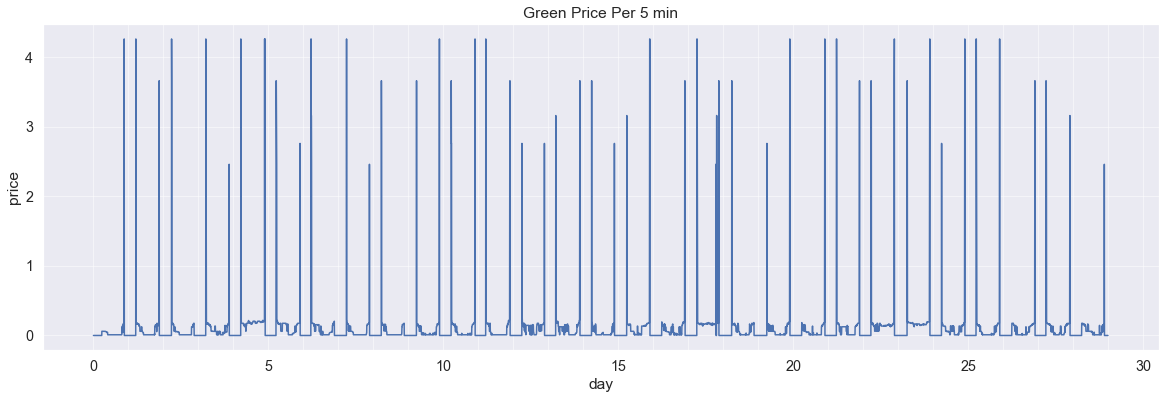

In [4]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
# plt.ylim(0, 30)
# plt.xlim(0, 5)
ax.plot(auction_times, green_prices)
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)
# plt.plot(auction_times, brown_avg_price)
plt.xlabel('day')
plt.ylabel('price')
plt.title('Green Price Per 5 min')
plt.savefig('comb_green_price.png')
plt.show()

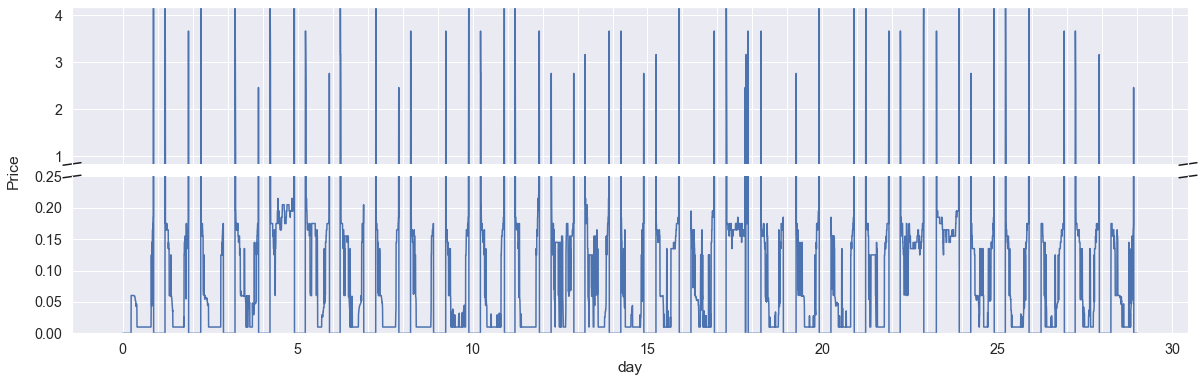

In [29]:
f, (ax, ax2) = plt.subplots(2, 1, figsize=(20,6),sharex=True)
# plt.figure(figsize=(8,6))
# plot the same data on both axes
ax.plot(auction_times, green_prices)
ax2.plot(auction_times, green_prices)
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(5/6, 25/6)  # outliers only
ax2.set_ylim(0, 1.5/6)  # most of the data
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax2.grid(which='both')

# Or if you want different settings for the grids:
ax2.grid(which='minor', alpha=1)
ax2.grid(which='major', alpha=1)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .008  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace=0.08)
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# fig = plt.figure(figsize=(8,6))
f.text(0.08, 0.5, "Price", va="center", rotation="vertical")
plt.xlabel('day')
# ax.set_ylabel('price')
plt.savefig('google_green_price.png')
plt.show()

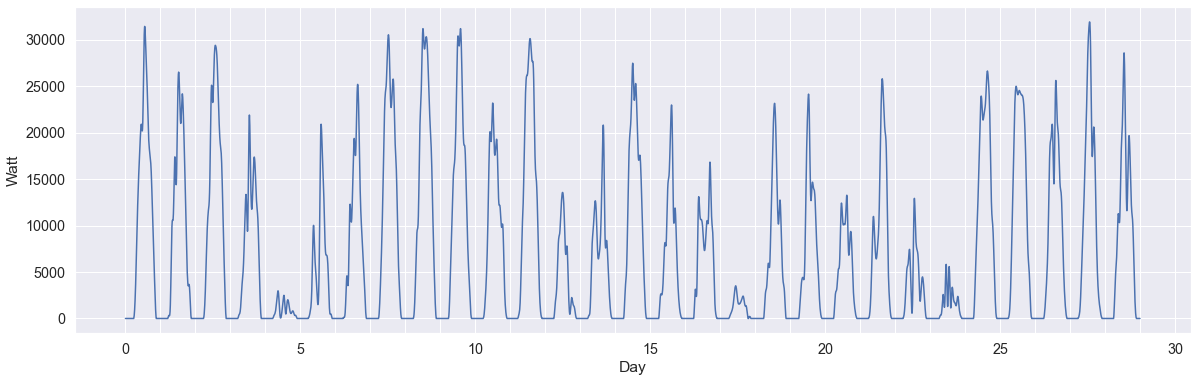

<Figure size 432x288 with 0 Axes>

In [32]:
# plt.figure(figsize=(20,6))
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(auction_times, green_supply / 6)
plt.xlabel('Day')
plt.ylabel('Watt')
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

# plt.xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.title('Number of Queued Jobs')
plt.savefig('google_green_power.png')
plt.show()

# plt.plot(auction_times, green_supply / 6)
# plt.xlabel('Day')
# plt.ylabel('Watt')

# # plt.xlim(0, 5)

# # plt.title('Green Power Supply')
plt.savefig('green_power.png')
plt.show()

In [33]:
# num_minutes_exceeded = np.arange(0, 30)
# disutility_low = 0.01 * np.log(num_minutes_exceeded + np.e)
# disutility_mid = 0.1 + 0.01 * num_minutes_exceeded
# disutility_high = 1 + 0.05*num_minutes_exceeded*num_minutes_exceeded

# plt.figure(figsize=(8,6))
# plt.plot(disutility_low, label='low priority')
# plt.plot(disutility_mid, label='mid priority')
# # plt.plot(disutility_high, label='high priority')
# plt.xlabel('Minutes Exceeding Ideal completion')
# plt.ylabel('Marginal Disutility')
# plt.legend()
# plt.title('Low + Mid Disutility Curves')
# plt.savefig('low_mid_disutility.png')
# plt.show()

In [34]:
def solar_gen(time):
	day_time = time % 86400
	# assume 6am to 8pm sunlight
	if day_time < 6*3600 or day_time > 20*3600:
		return 0

	peak = 1000 # watts

	hour_day = day_time / 3600.
	power = -1*(hour_day - 4)*(hour_day-20)
	power *= (peak / 64)

In [35]:
power = []
start = 0
solar_gen(start)

0

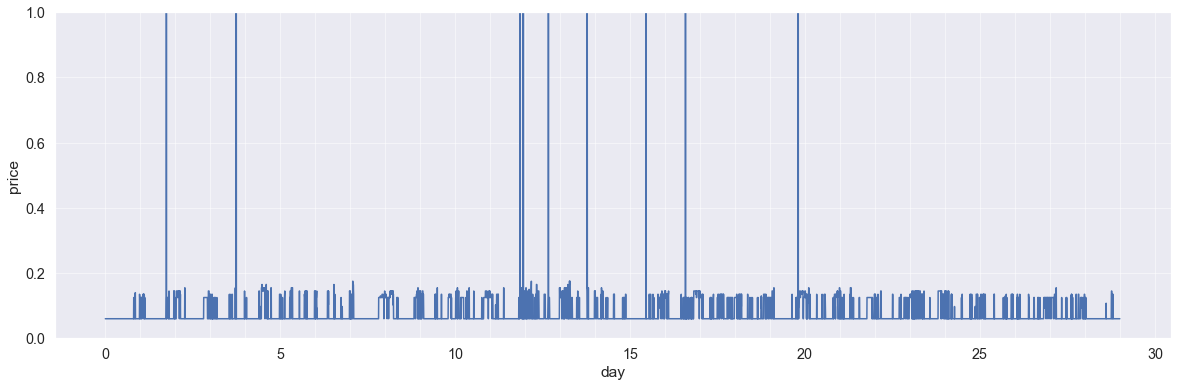

In [10]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0, 1)
ax.plot(auction_times, brown_avg_price)
# plt.plot(auction_times, brown_avg_price)
plt.xlabel('day')
plt.ylabel('price')
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)
# plt.xlim(0, 5)
# plt.ylim(0, 1)
# plt.title('Brown Price Per 5 Min')
plt.savefig('comb_brown_price.png')
plt.show()

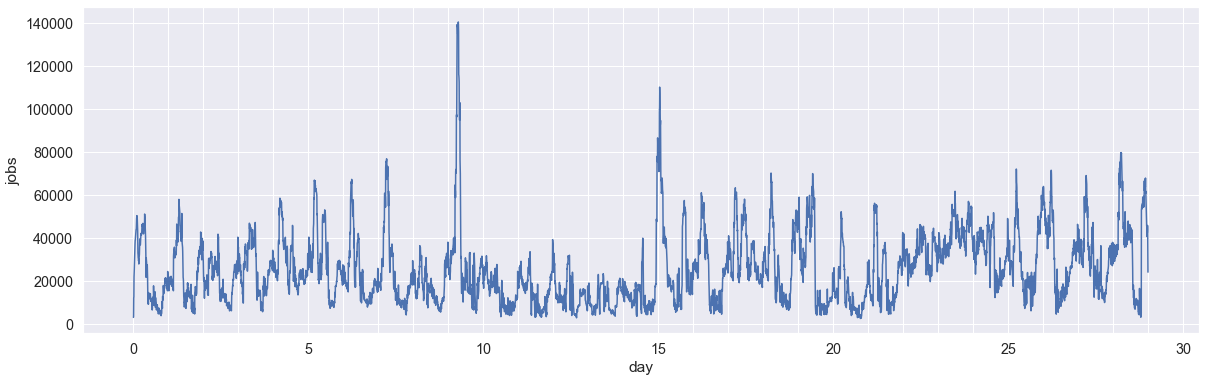

In [36]:
# plt.figure(figsize=(20,6))
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(auction_times, num_queued_jobs)
plt.xlabel('day')
plt.ylabel('jobs')
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

# plt.xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.title('Number of Queued Jobs')
plt.savefig('google_num_queued_jobs.png')
plt.show()

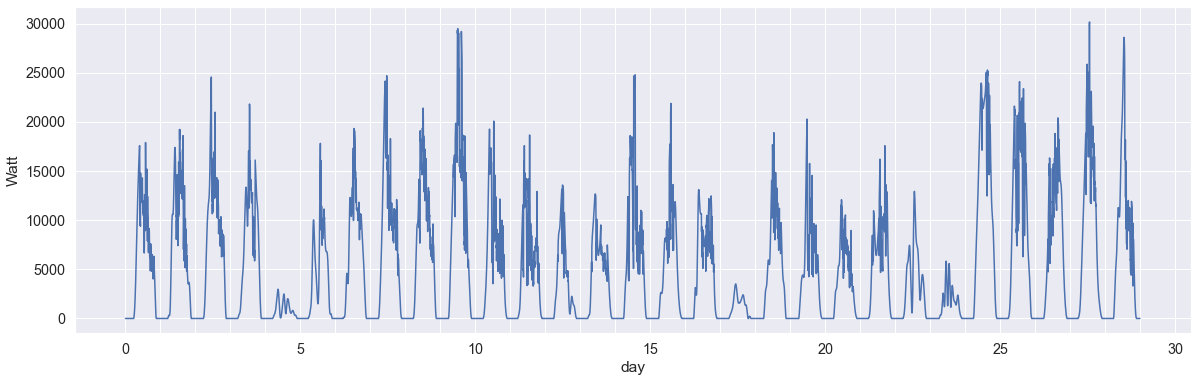

In [37]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(auction_times, green_usage)
plt.xlabel('day')
plt.ylabel('Watt')

major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

# plt.xlim(0, 5)
# plt.title('Green energy usuage')
plt.savefig('google_green_usage.png')
plt.show()

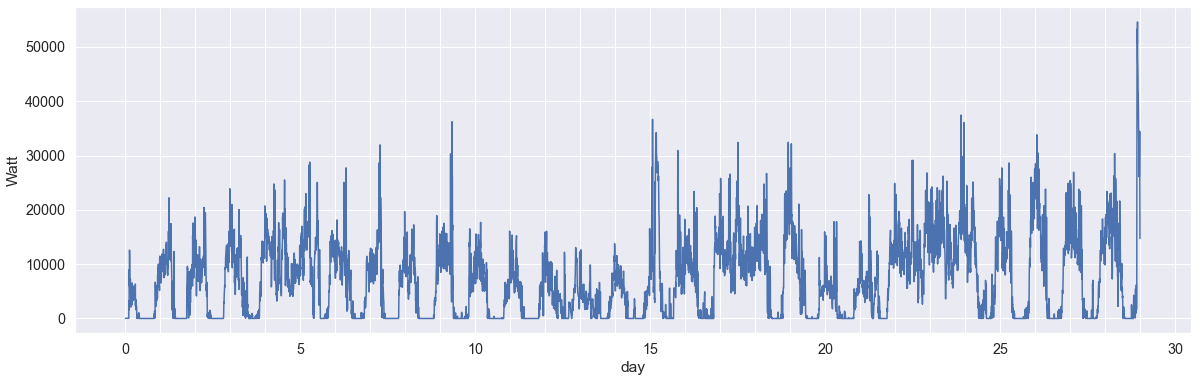

In [38]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(auction_times, brown_usage)
plt.xlabel('day')
plt.ylabel('Watt')
major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)
# plt.xlim(0, 5)
# plt.title('Brown usage')
plt.savefig('google_brown_usage.png')
plt.show()

In [ ]:
solar = np.loadtxt('data/solarpower.txt', skiprows=1)
wind = np.loadtxt('data/windpower.txt', skiprows=1)


In [ ]:
left = 214500
right = 235000

combined = solar[left:right]*1000 + wind[left:right]*(1000/3)
combined = np.minimum(combined, 1000)
solar_frac = solar[left:right]*1000
wind_frac = wind[left:right]*(1000/3)

In [ ]:
plt.plot(solar_frac)
plt.title('solar')
plt.ylabel('Watts')

In [ ]:
plt.plot(wind_frac)
plt.title('wind')
plt.ylabel('watts')

In [ ]:
plt.plot(combined)
plt.ylabel('watts')
plt.title('combined renewable')

In [ ]:
np.savetxt('data/solar_fraction_raw_energy.txt', solar_frac)
np.savetxt('data/wind_fraction_raw_energy.txt', wind_frac)
np.savetxt('data/combined_energy.txt', combined)

In [ ]:
def disutility(num_minutes_exceeded, priority='low'):
    disutility = 0
    if priority == 'low':
        disutility = 0.01 * np.log(num_minutes_exceeded + np.e)
    elif priority == 'mid':
        disutility = 0.1 + 0.01 * num_minutes_exceeded
    elif priority == 'high':
        disutility = 1 + 0.05*num_minutes_exceeded*num_minutes_exceeded
    return disutility

In [ ]:
low = []
mid = []
high = []
for i in range(30):
    low.append(disutility(i, priority='low'))
    mid.append(disutility(i, priority='mid'))
    high.append(disutility(i, priority='high'))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(low, label='low priority')
plt.plot(mid, label='mid priority')
plt.xlabel('Minutes Exceeding Ideal Completion')
plt.ylabel('Marginal Disutility')
plt.legend(loc='upper left')
# plt.title('Green Price Per Min')
plt.savefig('low_mid_disutility.png')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(low, label='low priority')
plt.plot(mid, label='mid priority')
plt.plot(high, label='high priority')
plt.xlabel('Minutes Exceeding Ideal Completion')
plt.ylabel('Marginal Disutility')
plt.legend(loc='upper left')
# plt.title('Green Price Per Min')
plt.savefig('all_disutility.png')
plt.show()

In [ ]:
bootstrap_low_pri_checks = np.load('bootstrap_low_pri_checks.txt.npy')
bootstrap_mid_pri_checks = np.load('bootstrap_mid_pri_checks.txt.npy')
bootstrap_high_pri_checks = np.load('bootstrap_high_pri_checks.txt.npy')

bootstrap_lpd = np.load('bootstrap_lpd.txt.npy')
bootstrap_mpd = np.load('bootstrap_mpd.txt.npy')
bootstrap_hpd = np.load('bootstrap_hpd.txt.npy')

bootstrap_lpp = np.load('bootstrap_lpp.txt.npy')
bootstrap_mpp = np.load('bootstrap_mpp.txt.npy')
bootstrap_hpp = np.load('bootstrap_hpp.txt.npy')

bootstrap_green_power_efficiency = np.load('bootstrap_green_power_efficiency.txt.npy')
bootstrap_total_green_usage = np.load('bootstrap_total_green_usage.txt.npy')

In [ ]:
plt.hist(bootstrap_low_pri_checks)
plt.title('Sampling Distribution of avg. # low priority checkpoints')
print('95% ci using 1.96*stddev:', np.mean(bootstrap_low_pri_checks), '+/-', 1.96*np.std(bootstrap_low_pri_checks))

In [ ]:
print('95% ci using 1.96*stddev:', np.mean(bootstrap_mid_pri_checks), '+/-', 1.96*np.std(bootstrap_mid_pri_checks))
print('95% ci using 1.96*stddev:', np.mean(bootstrap_high_pri_checks), '+/-', 1.96*np.std(bootstrap_high_pri_checks))
print()
print('95% ci using 1.96*stddev:', np.mean(bootstrap_lpd), '+/-', 1.96*np.std(bootstrap_lpd))
print('95% ci using 1.96*stddev:', np.mean(bootstrap_mpd), '+/-', 1.96*np.std(bootstrap_mpd))
print('95% ci using 1.96*stddev:', np.mean(bootstrap_hpd), '+/-', 1.96*np.std(bootstrap_hpd))
print()
print('95% ci using 1.96*stddev:', np.mean(bootstrap_lpp), '+/-', 1.96*np.std(bootstrap_lpp))
print('95% ci using 1.96*stddev:', np.mean(bootstrap_mpp), '+/-', 1.96*np.std(bootstrap_mpp))
print('95% ci using 1.96*stddev:', np.mean(bootstrap_hpp), '+/-', 1.96*np.std(bootstrap_hpp))
print()
print('95% ci using 1.96*stddev:', np.mean(bootstrap_green_power_efficiency), '+/-', 1.96*np.std(bootstrap_green_power_efficiency))
print('95% ci using 1.96*stddev:', np.mean(bootstrap_total_green_usage), '+/-', 1.96*np.std(bootstrap_total_green_usage))



In [ ]:
lows = [116636, 116562, 116390, 116465, 116476, 116243, 116081, 116450, 116661, 116501, 116273, 116692, 116555, 116604, 116444, 116430, 116277, 116122, 116308, 116512, 116333, 116318, 116520, 116377, 116716, 116643, 116410, 116213, 116478, 116394, 116576, 116604, 116280, 116401, 116335, 116558, 116632, 116147, 116482, 116736, 116321, 116569, 116409, 116302, 116415, 116113, 116460, 116104, 116350, 116655, 116405, 116364, 116321, 116624, 116397, 116020, 116515, 116591, 116242, 116425, 116721, 116327, 116231, 116497, 116603, 116334, 116502, 116308, 116614, 116443, 116699, 116673, 116546, 116481, 116083, 116417, 116348, 116523, 116410, 116000, 116370, 116461, 116524, 116610, 116592, 116376, 115824, 116398, 116562, 116154, 116638, 116446, 116153, 116484, 116281, 116364, 116494, 116661, 116414, 116461]
mids = [42602, 42874, 42790, 42775, 42679, 42922, 43199, 42704, 42657, 42653, 42877, 42713, 42715, 42669, 42711, 42923, 43007, 43135, 42758, 42751, 42961, 42699, 42858, 42962, 42607, 42703, 42847, 43052, 43064, 42949, 42666, 42838, 42905, 42920, 43012, 42806, 42597, 42918, 42829, 42499, 42785, 42929, 42839, 42957, 42745, 43054, 42856, 43037, 42981, 42569, 42880, 43062, 42959, 42890, 42835, 43105, 42864, 42629, 42919, 42745, 42542, 42875, 42942, 42659, 42638, 42906, 42792, 42922, 42775, 42693, 42401, 42750, 42777, 42711, 43253, 42957, 42903, 42668, 42723, 43266, 42734, 42930, 42707, 42520, 42712, 42842, 43239, 42691, 42832, 43080, 42617, 42787, 43100, 42768, 42777, 42790, 42793, 42745, 42927, 42802]
his = [15762, 15564, 15820, 15760, 15845, 15835, 15720, 15846, 15682, 15846, 15850, 15595, 15730, 15727, 15845, 15647, 15716, 15743, 15934, 15737, 15706, 15983, 15622, 15661, 15677, 15654, 15743, 15735, 15458, 15657, 15758, 15558, 15815, 15679, 15653, 15636, 15771, 15935, 15689, 15765, 15894, 15502, 15752, 15741, 15840, 15833, 15684, 15859, 15669, 15776, 15715, 15574, 15720, 15486, 15768, 15875, 15621, 15780, 15839, 15830, 15737, 15798, 15827, 15844, 15759, 15760, 15706, 15770, 15611, 15864, 15900, 15577, 15677, 15808, 15664, 15626, 15749, 15809, 15867, 15734, 15896, 15609, 15769, 15870, 15696, 15782, 15937, 15911, 15606, 15766, 15745, 15767, 15747, 15748, 15942, 15846, 15713, 15594, 15659, 15737]
print('95% ci using 1.96*stddev:', np.mean(lows), '+/-', 1.96*np.std(lows))
print('95% ci using 1.96*stddev:', np.mean(mids), '+/-', 1.96*np.std(mids))
print('95% ci using 1.96*stddev:', np.mean(his), '+/-', 1.96*np.std(his))



In [ ]:
plt.hist(mids)

In [ ]:
for i in range(1, 0):
    print(i)

Problem -- noisy pertubation of duration makes hi-pri jobs prone to highly overestimate value

1min:
revenue, value 464505.25021576235 1169161.4711453165
num checkpoints: 1198484 335043 0
low pri: 107287, # mid pri: 40142, # high pri: 14946
low pri delay: 7380.881954855316, mid pri delay: 611.6817486917837, high pri delay: 58.65116929700024
low pri cost: 1.358467203159269, mid pri cost: 2.633933647675555, high pri cost: 13.325232722464191
overall disutility: 692776.3301075886


2min:
revenue, value 472160.34973246255 1016698.8755233319
num checkpoints: 2066096 200637 82
low pri: 111174, # mid pri: 41349, # high pri: 15435
low pri delay: 3963.991936366445, mid pri delay: 1081.6803189482011, high pri delay: 120.7523942843342
low pri cost: 0.7964191345147167, mid pri cost: 4.625287355341775, high pri cost: 11.633258053013149
overall disutility: 540313.734486179

3min:
revenue, value 463203.4538576141 1035243.4196749318
num checkpoints: 1332323 109606 117
low pri: 112236, # mid pri: 41793, # high pri: 15572
low pri delay: 4038.393048172362, mid pri delay: 1091.403089448192, high pri delay: 184.64442795409553
low pri cost: 0.7606235065161894, mid pri cost: 4.55345440824556, high pri cost: 11.247123181483863
overall disutility: 558858.2786377302

4min:
revenue, value 525525.7008400233 1176741.6784408912
num checkpoints: 999945 79116 450
low pri: 112495, # mid pri: 41939, # high pri: 15677
low pri delay: 4515.837868877626, mid pri delay: 1271.4335591153883, high pri delay: 261.823736269537
low pri cost: 0.776756627236898, mid pri cost: 5.057055435057115, high pri cost: 13.551832424765912
overall disutility: 700356.5374033278
loss func 174830.83656330442

5min:
revenue, value 2319345.5379627147 4240243.827563695
num checkpoints: 681441 138675 2419
low pri: 110469, # mid pri: 41437, # high pri: 15690
low pri delay: 9194.61184543018, mid pri delay: 3634.8649847464812, high pri delay: 544.7313224974895
low pri cost: 0.8702036453559185, mid pri cost: 11.894469455659138, high pri cost: 104.88067131257833
overall disutility: 3763858.6865262007

6min:
revenue, value 3893846.1189400204 6837335.583646317
num checkpoints: 598883 144161 2500
low pri: 110715, # mid pri: 41137, # high pri: 15705
low pri delay: 10983.81673557188, mid pri delay: 5037.741878408283, high pri delay: 732.2888216602
low pri cost: 0.9240942493919903, mid pri cost: 15.787900099985919, high pri cost: 190.45065875311352
overall disutility: 6360950.442608949
loss func 2467104.3236689284

In [ ]:
costs = [1600962.4170282052, 830109.5713701029, 596081.8479259082, 463712.3334075631, 481718.9180840388, 364440.5687251447, 471367.5817687511, 433142.0573692397, 432742.11431840196, 1715662.1087531438]
costs = np.array(costs)
costs /= 1e6
plt.figure(figsize=(8,6))
plt.xlabel('Auction Interval (min.)')
plt.ylabel('Cost')
plt.plot(np.arange(len(costs)) + 1, costs)

In [ ]:
1min:
7.065140596297867 1000000 141540
revenue, value 760023.2182882135 1557873.3525725058
num checkpoints: 1247165 0 0
# low pri: 434606, # mid pri: 540793, # high pri: 7199
low pri delay: 4524.072158615208, mid pri delay: 60.24166475506774, high pri delay: 59.03622128726144
low pri cost: 0.9144397531804739, mid pri cost: 0.6288359290359404, high pri cost: 1.0617852189984678
green energy total usage: 12734187.0
total available green energy: 23066250.0
brown energy total usage: 7053809.0
gross execution time: 19787996.0
overall disutility: 1283681.3228628172
loss func 1600962.4170282052

In [ ]:
2min:
revenue, value 802972.977053051 1633672.3695875143
num checkpoints: 610608 0 0
# low pri: 435274, # mid pri: 540767, # high pri: 7526
low pri delay: 4642.792520848307, mid pri delay: 116.83158384682561, high pri delay: 124.60819252923133
low pri cost: 0.9415257384854194, mid pri cost: 0.6837643883719734, high pri cost: 1.1327141731122918
green energy total usage: 12982092.0
total available green energy: 23054160.0
brown energy total usage: 7289368.0
gross execution time: 20271460.0
overall disutility: 1359480.3398745232
loss func 830109.5713701029

In [ ]:
3min:
revenue, value 854993.2377355896 1727185.487084961
num checkpoints: 408200 2044 0
# low pri: 435516, # mid pri: 541042, # high pri: 7636
low pri delay: 4726.950796194676, mid pri delay: 179.4153027802136, high pri delay: 188.21368405028747
low pri cost: 0.9625701617510226, mid pri cost: 0.7610707098464808, high pri cost: 1.1885276173315358
green energy total usage: 13225905.0
total available green energy: 23065920.0
brown energy total usage: 7564005.0
gross execution time: 20789910.0
overall disutility: 1452993.4573714868
loss func 596081.8479259082

In [ ]:
4min:
num checkpoints: 293536 2099 0
# low pri: 434715, # mid pri: 540781, # high pri: 7684
low pri delay: 4827.673063759693, mid pri delay: 243.24604630627067, high pri delay: 256.47399505960374
low pri cost: 0.9875325047051049, mid pri cost: 0.833462957232589, high pri cost: 1.3795217282862269
green energy total usage: 13442860.0
total available green energy: 23030400.0
brown energy total usage: 7794440.0
gross execution time: 21237300.0
overall disutility: 1568529.887894069
loss func 463712.3334075631

In [ ]:
5min
revenue, value 763266.9489727804 850136.6375193304
num checkpoints: 833089 3236 73
# low pri: 434676, # mid pri: 540052, # high pri: 7709
low pri delay: 1210.0465535673736, mid pri delay: 295.3816799627228, high pri delay: 338.45643358775396
low pri cost: 0.4343728842198636, mid pri cost: 1.0204899738383428, high pri cost: 2.5898969805667966
green energy total usage: 12324660.0
total available green energy: 23017950.0
brown energy total usage: 9343690.0
gross execution time: 21668350.0
overall disutility: 575944.6078111603
loss func 481718.9180840388

In [ ]:
6min:
num checkpoints: 196692 1281 0
# low pri: 435806, # mid pri: 541322, # high pri: 7749
low pri delay: 5044.36410155677, mid pri delay: 366.12014442499355, high pri delay: 395.58144330416764
low pri cost: 1.0523691913304702, mid pri cost: 0.967708748807218, high pri cost: 1.4811083872288928
green energy total usage: 13989684.0
total available green energy: 23101560.0
brown energy total usage: 8441910.0
gross execution time: 22431594.0
overall disutility: 1840859.9593133645
loss func 364440.5687251447

In [ ]:
7min:
revenue, value 1145584.8391293748 2327052.6083614877
num checkpoints: 224224 5391 0
# low pri: 435891, # mid pri: 541401, # high pri: 7760
low pri delay: 5209.956777577655, mid pri delay: 448.65659396807604, high pri delay: 466.83517656353035
low pri cost: 1.0952828458222026, mid pri cost: 1.1788866185988995, high pri cost: 1.8283845544080635
green energy total usage: 14327558.0
total available green energy: 23138220.0
brown energy total usage: 8819300.0
gross execution time: 23146858.0
overall disutility: 2052860.5786588467
loss func 471367.5817687511

In [ ]:
8min:
7.086167800453515 1000000 141120
revenue, value 1188288.913198656 2519091.1323990007
num checkpoints: 188522 4423 0
# low pri: 434867, # mid pri: 540793, # high pri: 7752
low pri delay: 5334.3640169339915, mid pri delay: 518.762992953676, high pri delay: 544.858268787022
low pri cost: 1.1359402769526303, mid pri cost: 1.223210683147759, high pri cost: 2.3108888538815986
green energy total usage: 14515720.0
total available green energy: 22981920.0
brown energy total usage: 9174672.0
gross execution time: 23690392.0
overall disutility: 2244899.1026937193
loss func 433142.0573692397

In [ ]:
9min:
revenue, value 1297302.8857177156 2779153.5027773245
num checkpoints: 167555 5199 0
# low pri: 435904, # mid pri: 543261, # high pri: 7773
low pri delay: 5468.566753333106, mid pri delay: 603.1101795717406, high pri delay: 624.878831303743
low pri cost: 1.1624186586716376, mid pri cost: 1.395292294837981, high pri cost: 2.130856531884725
green energy total usage: 14940342.0
total available green energy: 23138460.0
brown energy total usage: 9717795.0
gross execution time: 24658137.0
overall disutility: 2504961.4730680734
loss func 432742.11431840196

In [ ]:
10 min
revenue, value 1848669.8160678681 2923294.55248908
num checkpoints: 644003 3528 108
# low pri: 434771, # mid pri: 539927, # high pri: 7766
low pri delay: 3442.5407261342293, mid pri delay: 680.1255570502684, high pri delay: 862.3166277652582
low pri cost: 0.5887455851496326, mid pri cost: 1.7736514988414473, high pri cost: 81.44315771096899
green energy total usage: 14016610.0
total available green energy: 22957800.0
brown energy total usage: 11120450.0
gross execution time: 25137060.0
overall disutility: 2649102.522783748
loss func 1715662.1087531438

In [ ]:
np.median(green_prices) # np.count_nonzero(green_prices < brown_avg_price) / len(green_prices)

In [ ]:
plt.plot(green_prices)
plt.ylim(0, 0.1)

In [ ]:
## Full

In [ ]:
6min:
revenue, value 34795009.56696924 36823654.95607044
num checkpoints: 7355129 90339 62
# low pri: 5425874, # mid pri: 11274830, # high pri: 159901
low pri delay: 6609.3878254291785, mid pri delay: 368.79377693575293, high pri delay: 405.3008443025029
low pri cost: 1.3741614552974248, mid pri cost: 2.39112307910431, high pri cost: 2.3090543183186205
green energy total usage: 208263246.0
total available green energy: 290182140.0
brown energy total usage: 292669584.0
gross execution time: 500932830.0
overall disutility: 32894204.32942065
loss func 14510020.739417259

num auctions: 6959

In [ ]:
5min:
revenue, value 32649171.338872753 33675310.40023883
num checkpoints: 8451336 94660 46
# low pri: 5425115, # mid pri: 11274098, # high pri: 159869
low pri delay: 6417.15216113526, mid pri delay: 307.9643002942279, high pri delay: 331.3261968873547
low pri cost: 1.336949109013233, mid pri cost: 2.2227156579044567, high pri cost: 2.040615808993901
green energy total usage: 205310130.0
total available green energy: 290188800.0
brown energy total usage: 285651990.0
gross execution time: 490962120.0
overall disutility: 29745859.773518734
loss func 15060679.918466877
556

In [ ]:
## Fixed price

In [ ]:
total disutility 6885681465.737986
num checkpoints: 0 0 0
# low pri: 0, # mid pri: 11256228, # high pri: 159900
/Users/hari/miniconda3/envs/econ/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hari/miniconda3/envs/econ/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
low pri delay: nan, mid pri delay: 4763.473150451455, high pri delay: 3205.6996707423987
low pri cost: nan, mid pri cost: 2.0908240291507973, high pri cost: 1.3323718574108825
green energy total usage: 1550568
total available green energy: 1612123
brown energy total usage: 55064502
gross execution time: 339690420.0
green energy total usage: 1550568
brown energy total usage: 55064502